In [2]:
%matplotlib inline

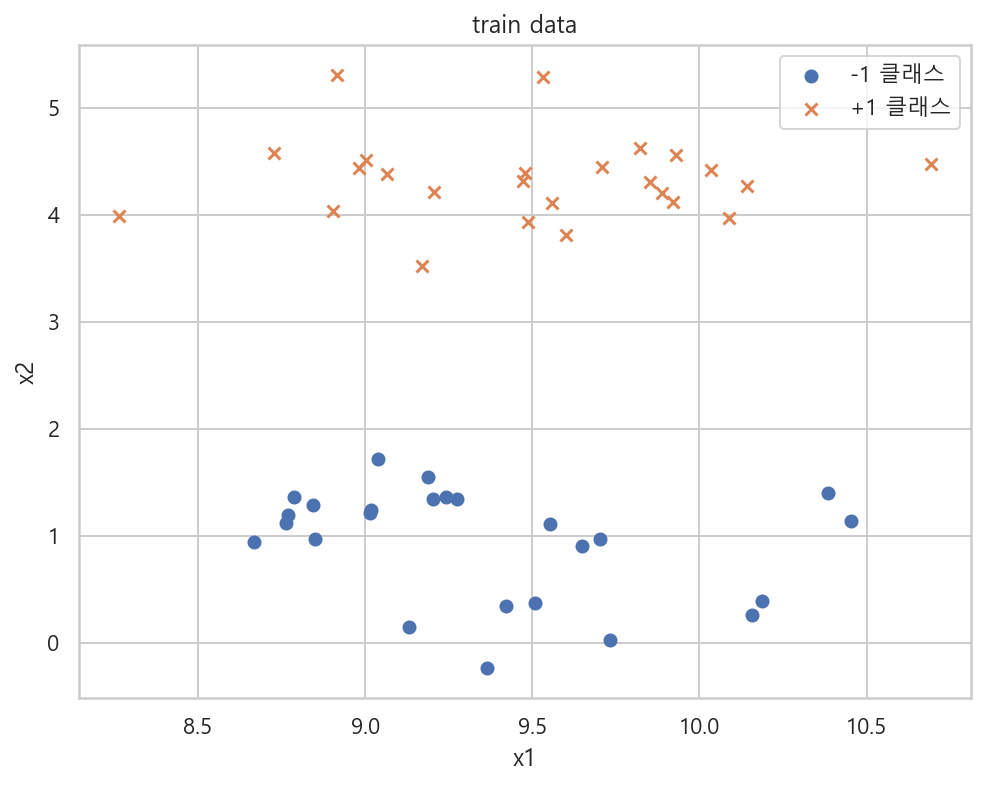

In [3]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, centers=2, cluster_std=0.5, random_state=4)
y = 2 * y - 1

plt.figure(figsize=(8, 6))
plt.scatter(X[y == -1, 0], X[y == -1, 1], marker="o", label="-1 클래스")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker="x", label="+1 클래스")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("train data")
plt.legend()
plt.show() ; 

In [4]:
from sklearn.svm import SVC

model = SVC(kernel="linear", C=1e10).fit(X, y)
model

SVC(C=10000000000.0, kernel='linear')

In [5]:
model.n_support_

array([1, 1])

In [6]:
model.support_

array([42,  1])

In [7]:
model.support_vectors_

array([[9.03715314, 1.71813465],
       [9.17124955, 3.52485535]])

In [8]:
model.coef_

array([[0.08171082, 1.10091404]])

In [9]:
model.intercept_

array([-3.62995208])

In [10]:
model.dual_coef_

array([[-0.60934379,  0.60934379]])

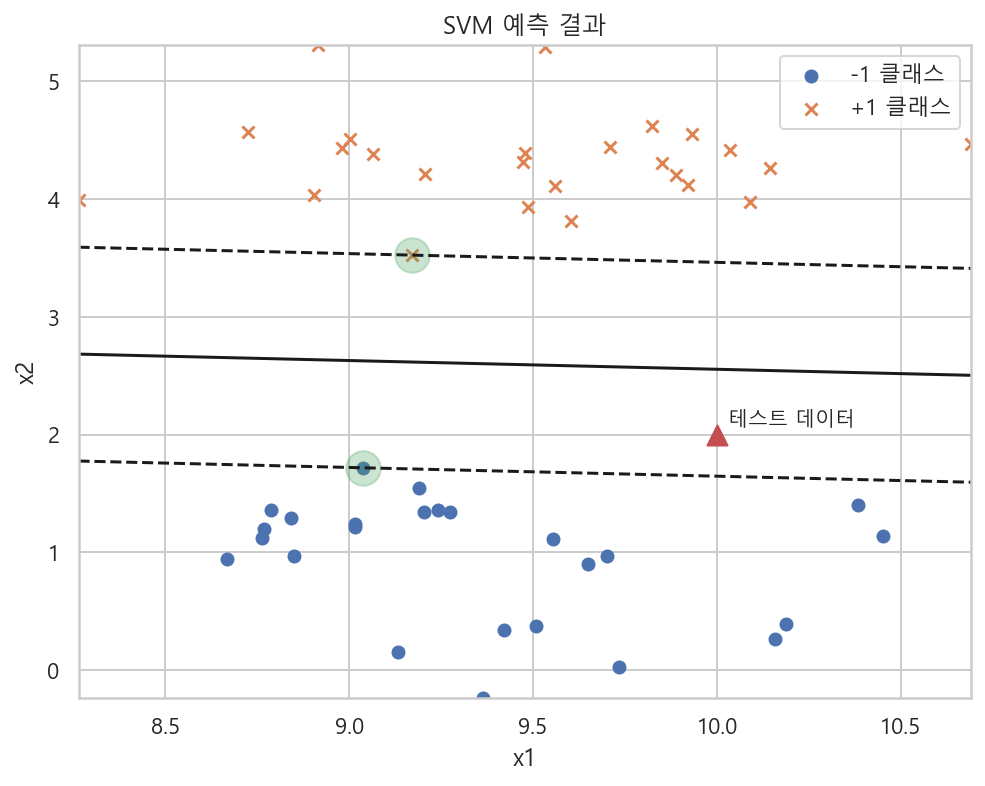

In [13]:
xmin = X[:, 0].min()
xmax = X[:, 0].max()
ymin = X[:, 1].min()
ymax = X[:, 1].max()

xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy)
Z = np.empty(X1.shape)

for (i, j), val in np.ndenumerate(X1) : 
    x1 = val
    x2 = X2[i, j]
    p = model.decision_function([[x1, x2]])
    Z[i, j] = p[0]
    
levels = [-1, 0, 1]
linestyles = ["dashed", "solid", "dashed"]

plt.figure(figsize=(8, 6))
plt.scatter(X[y == -1, 0], X[y == -1, 1], marker="o", label="-1 클래스")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker="x", label="+1 클래스")
plt.contour(X1, X2, Z, levels, colors="k", linestyles=linestyles)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, alpha=0.3)

x_new = [10, 2]
plt.scatter(x_new[0], x_new[1], marker="^", s=100)
plt.text(x_new[0] + 0.03, x_new[1] + 0.08, "테스트 데이터")

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("SVM 예측 결과")
plt.legend()
plt.show() ; 

In [1]:
%matplotlib inline

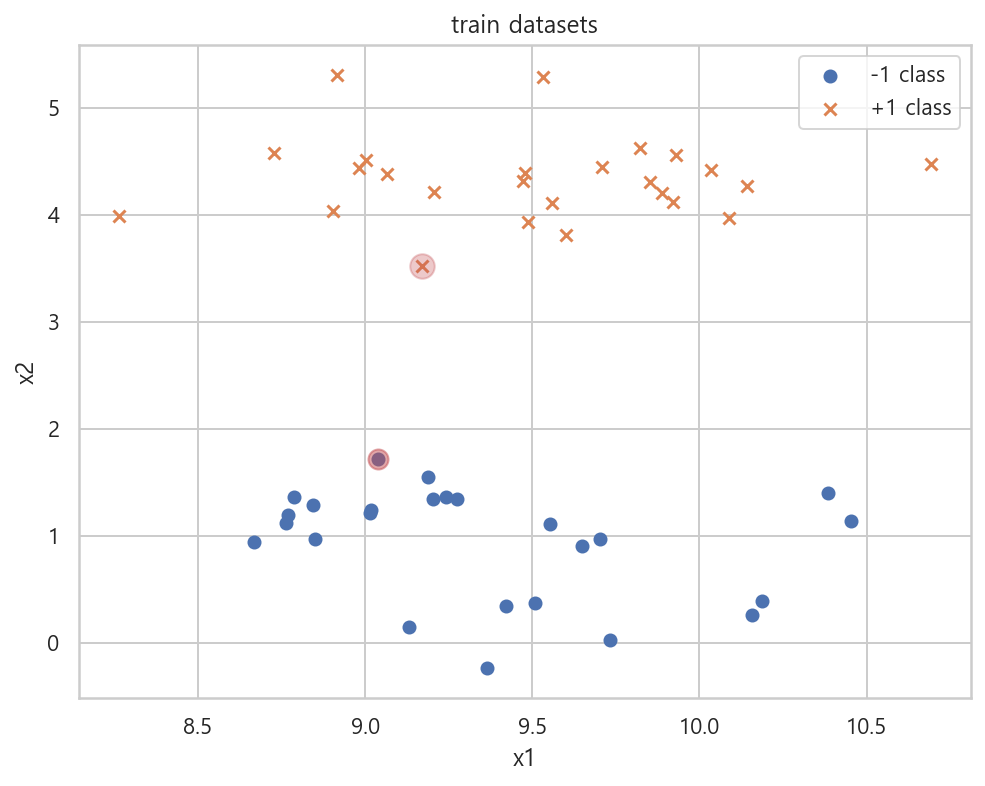

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, centers=2, cluster_std=0.5, random_state=4)
y = 2 * y - 1

plt.figure(figsize=(8, 6))
plt.scatter(X[y == -1, 0], X[y == -1, 1], marker="o", label="-1 class")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker="x", label="+1 class")
plt.scatter(X[42, 0], X[42, 1], c="r", s=100, alpha=0.5)
plt.scatter(X[1, 0], X[1, 1], c="r", s=150, alpha=0.3)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("train datasets")
plt.legend()
plt.show() ; 

In [3]:
from sklearn.svm import SVC

model_svc = SVC(kernel="linear", C=1e10).fit(X, y)
model_svc

SVC(C=10000000000.0, kernel='linear')

In [4]:
model_svc.n_support_

array([1, 1])

In [5]:
model_svc.support_

array([42,  1])

In [6]:
temp_df = pd.DataFrame(X)
temp_df["y"] = y
temp_df.rename(columns={0: "x1", 1: "x2"}, inplace=True)
temp_df

,x1,x2,y
0,9.242224,1.362909,-1
1,9.171250,3.524855,1
2,8.842642,1.291444,-1
3,9.131446,0.152356,-1
4,8.666867,0.939965,-1
5,8.768697,1.199605,-1
6,10.452277,1.141793,-1
7,9.487423,3.930188,1
8,9.558344,4.109097,1
9,10.035781,4.417650,1


In [7]:
temp_df.iloc[42]

x1    9.037153
x2    1.718135
y    -1.000000
Name: 42, dtype: float64

In [8]:
temp_df.iloc[1]

x1    9.171250
x2    3.524855
y     1.000000
Name: 1, dtype: float64

In [9]:
model_svc.support_vectors_

array([[9.03715314, 1.71813465],
       [9.17124955, 3.52485535]])

In [10]:
y[model_svc.support_]

array([-1,  1])

In [11]:
model_svc.intercept_

array([-3.62995208])

In [12]:
model_svc.coef_

array([[0.08171082, 1.10091404]])

In [13]:
model_svc.dual_coef_

array([[-0.60934379,  0.60934379]])

In [14]:
xmin = X[:, 0].min()
xmax = X[:, 0].max()
ymin = X[:, 1].min()
ymax = X[:, 1].max()

xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy)
Z = np.empty(X1.shape)

In [15]:
Z.shape, X1.shape, X2.shape

((10, 10), (10, 10), (10, 10))

In [16]:
for (i, j), val in np.ndenumerate(X1) : 
    print(i, j, val)

0 0 8.263799562304182
0 1 8.533597308717342
0 2 8.803395055130501
0 3 9.073192801543659
0 4 9.342990547956818
0 5 9.612788294369977
0 6 9.882586040783137
0 7 10.152383787196296
0 8 10.422181533609454
0 9 10.691979280022613
1 0 8.263799562304182
1 1 8.533597308717342
1 2 8.803395055130501
1 3 9.073192801543659
1 4 9.342990547956818
1 5 9.612788294369977
1 6 9.882586040783137
1 7 10.152383787196296
1 8 10.422181533609454
1 9 10.691979280022613
2 0 8.263799562304182
2 1 8.533597308717342
2 2 8.803395055130501
2 3 9.073192801543659
2 4 9.342990547956818
2 5 9.612788294369977
2 6 9.882586040783137
2 7 10.152383787196296
2 8 10.422181533609454
2 9 10.691979280022613
3 0 8.263799562304182
3 1 8.533597308717342
3 2 8.803395055130501
3 3 9.073192801543659
3 4 9.342990547956818
3 5 9.612788294369977
3 6 9.882586040783137
3 7 10.152383787196296
3 8 10.422181533609454
3 9 10.691979280022613
4 0 8.263799562304182
4 1 8.533597308717342
4 2 8.803395055130501
4 3 9.073192801543659
4 4 9.34299054795681

In [17]:
X1[0]

array([ 8.26379956,  8.53359731,  8.80339506,  9.0731928 ,  9.34299055,
        9.61278829,  9.88258604, 10.15238379, 10.42218153, 10.69197928])

In [18]:
X1[1]

array([ 8.26379956,  8.53359731,  8.80339506,  9.0731928 ,  9.34299055,
        9.61278829,  9.88258604, 10.15238379, 10.42218153, 10.69197928])

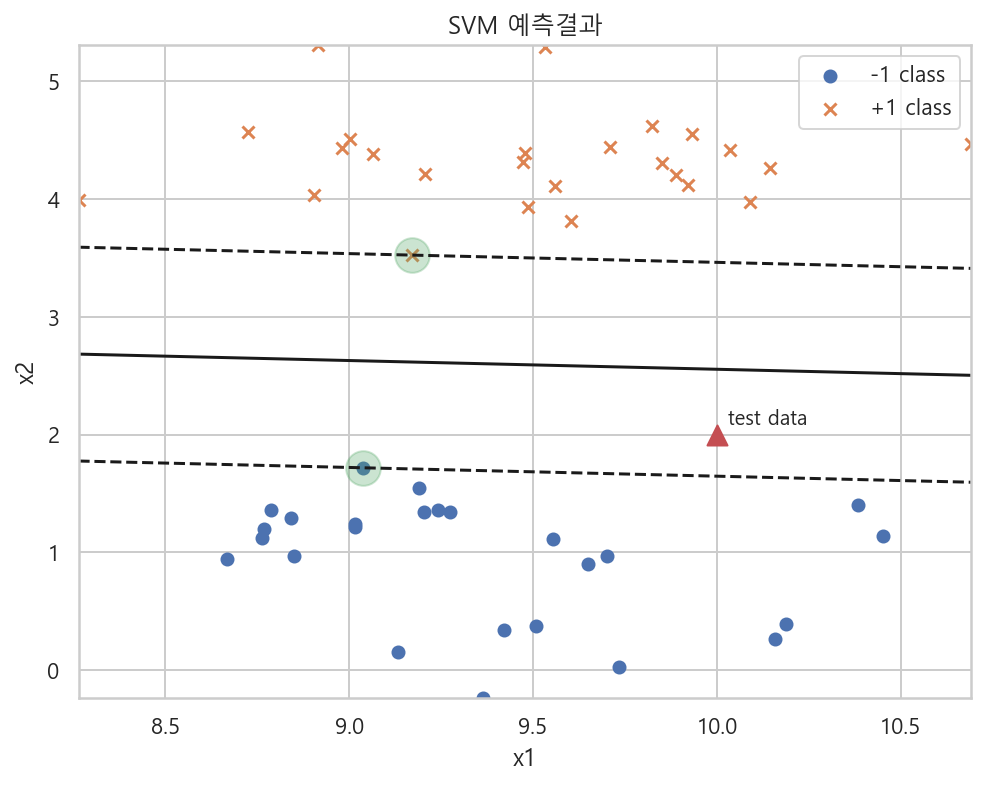

In [20]:
for (i, j), val in np.ndenumerate(X1) : 
    x1 = val
    x2 = X2[i, j]
    p = model_svc.decision_function([[x1, x2]])
    Z[i, j] = p[0]
    
levels = [-1, 0, 1]
linestyles = ["dashed", "solid", "dashed"]

plt.figure(figsize=(8, 6))
plt.scatter(X[y == -1, 0], X[y == -1, 1], marker="o", label="-1 class")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker="x", label="+1 class")
plt.contour(X1, X2, Z, levels, colors="k", linestyles=linestyles)
plt.scatter(model_svc.support_vectors_[:, 0], model_svc.support_vectors_[:, 1], s=300, alpha=0.3)

x_new = [10, 2]
plt.scatter(x_new[0], x_new[1], marker="^", s=100)
plt.text(x_new[0] + 0.03, x_new[1] + 0.08, "test data")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("SVM 예측결과")
plt.legend()

plt.show() ; 

In [22]:
x_new = [10, 2]
model_svc.decision_function([x_new])

array([-0.61101582])

In [23]:
model_svc.coef_.dot(x_new) + model_svc.intercept_

array([-0.61101582])

In [24]:
model_svc.dual_coef_

array([[-0.60934379,  0.60934379]])

In [25]:
model_svc.dual_coef_[0][0] * model_svc.support_vectors_[0].dot(x_new) + \
model_svc.dual_coef_[0][1] * model_svc.support_vectors_[1].dot(x_new) + \
model_svc.intercept_

array([-0.61101582])

## 붓꽃데이터를 사용하여 svc 분류하기

In [29]:
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [30]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [31]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [33]:
idx = np.in1d(iris.target, [0, 1])
idx

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [34]:
X = iris.data[idx, :2]
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [35]:
y = iris.target[idx]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [36]:
y = 2 * y - 1
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [37]:
from sklearn.svm import SVC

model = SVC(kernel="linear", C=1e10).fit(X, y)
model

SVC(C=10000000000.0, kernel='linear')

In [39]:
x_new = [[5.1, 4.6]]
model.predict(x_new)

array([-1])

In [43]:
x_new_2 = [[5.5, 2.6]]
model.predict(x_new_2)

array([1])

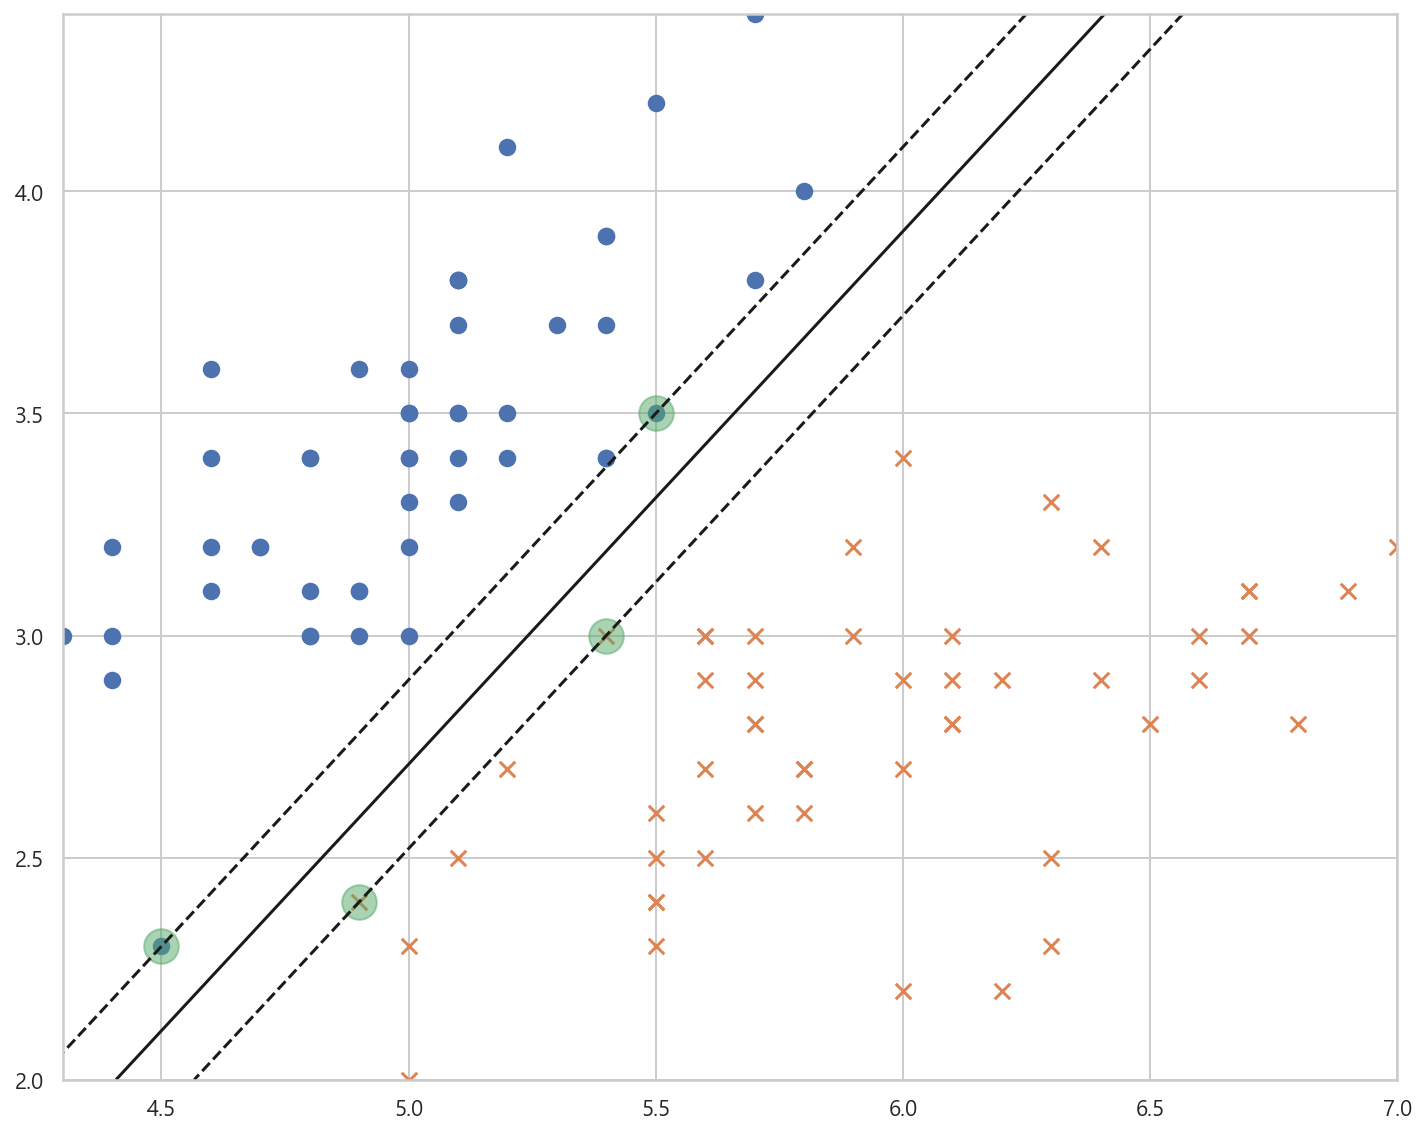

In [66]:
xmin = X[:, 0].min()
xmax = X[:, 0].max()
ymin = X[:, 1].min()
ymax = X[:, 1].max()
XX = np.linspace(xmin, xmax, 20)
YY = np.linspace(ymin, ymax, 20)
X1, X2 = np.meshgrid(XX, YY)
Z = np.empty(X1.shape)

for (i, j), val in np.ndenumerate(X1) : 
    x1 = val
    x2 = X2[i, j]
    p = model.decision_function([[x1, x2]])
    Z[i, j] = p[0]
    
plt.figure(figsize=(10, 8))
levels = [-1, 0, 1]
linestyles = ["dashed", "solid", "dashed"]
plt.scatter(X[y == -1, 0], X[y == -1, 1], s=60, marker="o", label="setosa")
plt.scatter(X[y == +1, 0], X[y == +1, 1], s=60, marker="x", label="versico")
plt.contour(X1, X2, Z, levels, colors="k", linestyles=linestyles)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, alpha=0.5)

plt.tight_layout()
plt.show() ; 

In [67]:
from sklearn.metrics import classification_report

print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [70]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:100, :2]
y = iris.target[:100]

from sklearn.svm import SVC
model = SVC(kernel="linear", C=1e10).fit(X, y)

from sklearn.metrics import classification_report
print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



## 슬랙변수

In [71]:
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [-1] * 20 + [1] * 20

In [73]:
X

array([[-0.23594765, -1.59984279],
       [-1.02126202,  0.2408932 ],
       [-0.13244201, -2.97727788],
       [-1.04991158, -2.15135721],
       [-2.10321885, -1.5894015 ],
       [-1.85595643, -0.54572649],
       [-1.23896227, -1.87832498],
       [-1.55613677, -1.66632567],
       [-0.50592093, -2.20515826],
       [-1.6869323 , -2.85409574],
       [-4.55298982, -1.3463814 ],
       [-1.1355638 , -2.74216502],
       [ 0.26975462, -3.45436567],
       [-1.95424148, -2.18718385],
       [-0.46722079, -0.53064123],
       [-1.84505257, -1.62183748],
       [-2.88778575, -3.98079647],
       [-2.34791215, -1.84365103],
       [-0.76970932, -0.79762015],
       [-2.38732682, -2.30230275],
       [ 0.95144703,  0.57998206],
       [ 0.29372981,  3.9507754 ],
       [ 1.49034782,  1.5619257 ],
       [ 0.74720464,  2.77749036],
       [ 0.38610215,  1.78725972],
       [ 1.10453344,  2.3869025 ],
       [ 1.48919486,  0.81936782],
       [ 1.97181777,  2.42833187],
       [ 2.06651722,

In [72]:
Y

[-1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

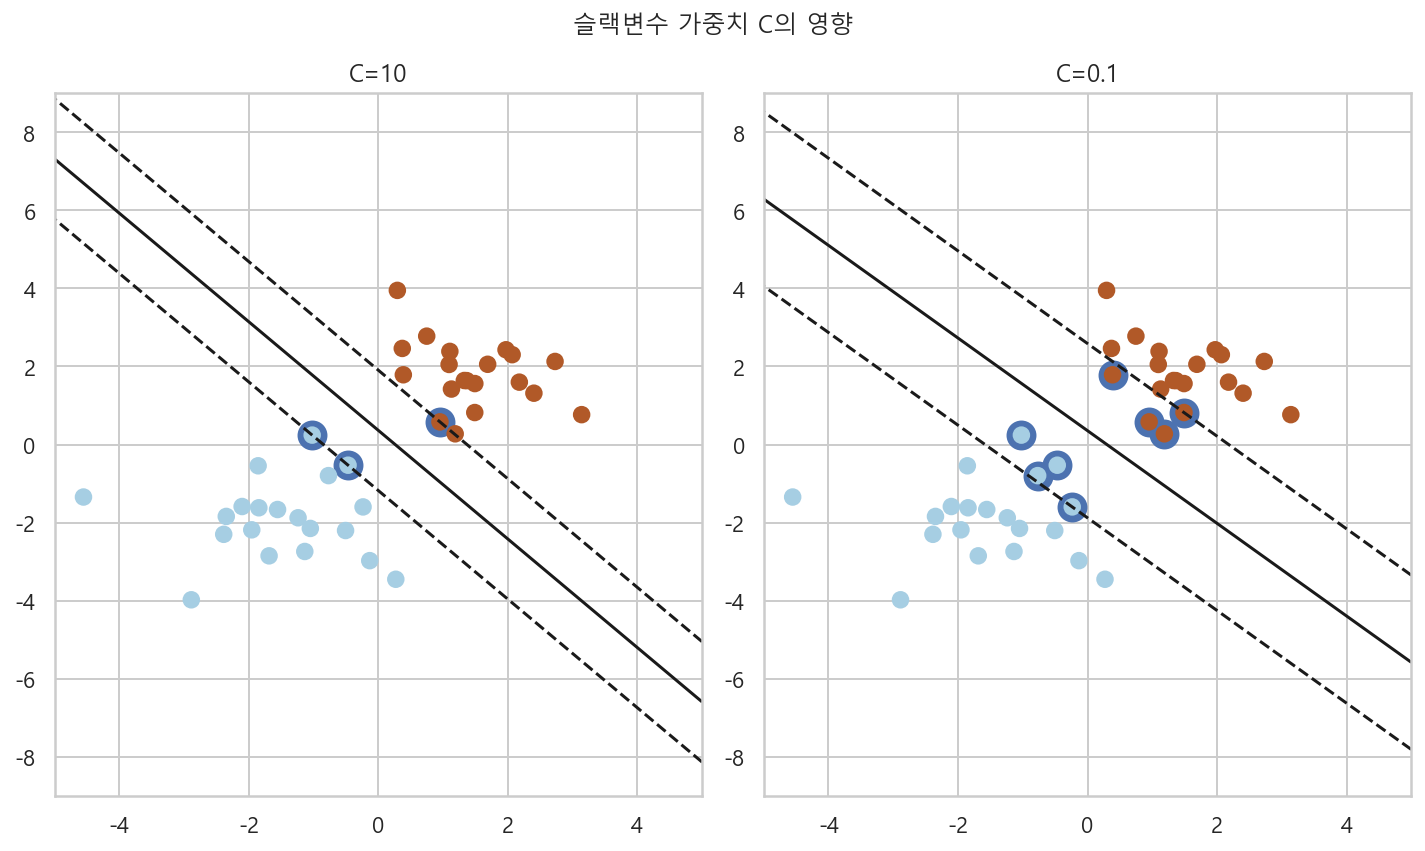

In [80]:
plt.figure(figsize=(10, 6))
plotnum = 1
for name, penalty in (("C=10", 10), ("C=0.1", 0.1)) : 
    clf = SVC(kernel="linear", C=penalty).fit(X, Y)
    xx = np.linspace(-5, 5)
    
    x_jin = -5
    x_jax = 5
    y_jin = -9
    y_jax = 9
    XX, YY = np.mgrid[x_jin:x_jax:200j, y_jin:y_jax:200j]
    
    levels = [-1, 0, 1]
    linestyle = ["dashed", "solid", "dashed"]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    
    plt.subplot(1, 2, plotnum)
    plt.contour(XX, YY, Z, levels, colors="k", linestyles=linestyles)
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=120, linewidth=4)
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=60, linewidth=1, cmap=plt.cm.Paired)
    plt.xlim(x_jin, x_jax)
    plt.ylim(y_jin, y_jax)
    plt.title(name)
    
    plotnum += 1
    
plt.suptitle("슬랙변수 가중치 C의 영향")
plt.tight_layout()
plt.show() ; 

In [76]:
x_jin = -5
x_jax = 5
y_jin = -5
y_jax = 5

np.mgrid[x_jin:x_jax:200j, y_jin:y_jax:200j]

array([[[-5.        , -5.        , -5.        , ..., -5.        ,
         -5.        , -5.        ],
        [-4.94974874, -4.94974874, -4.94974874, ..., -4.94974874,
         -4.94974874, -4.94974874],
        [-4.89949749, -4.89949749, -4.89949749, ..., -4.89949749,
         -4.89949749, -4.89949749],
        ...,
        [ 4.89949749,  4.89949749,  4.89949749, ...,  4.89949749,
          4.89949749,  4.89949749],
        [ 4.94974874,  4.94974874,  4.94974874, ...,  4.94974874,
          4.94974874,  4.94974874],
        [ 5.        ,  5.        ,  5.        , ...,  5.        ,
          5.        ,  5.        ]],

       [[-5.        , -4.94974874, -4.89949749, ...,  4.89949749,
          4.94974874,  5.        ],
        [-5.        , -4.94974874, -4.89949749, ...,  4.89949749,
          4.94974874,  5.        ],
        [-5.        , -4.94974874, -4.89949749, ...,  4.89949749,
          4.94974874,  5.        ],
        ...,
        [-5.        , -4.94974874, -4.89949749, ...,  

In [82]:
1e10

10000000000.0

In [83]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[50:, 2:]
y = iris.target[50: ] - 1

In [84]:
X

array([[4.7, 1.4],
       [4.5, 1.5],
       [4.9, 1.5],
       [4. , 1.3],
       [4.6, 1.5],
       [4.5, 1.3],
       [4.7, 1.6],
       [3.3, 1. ],
       [4.6, 1.3],
       [3.9, 1.4],
       [3.5, 1. ],
       [4.2, 1.5],
       [4. , 1. ],
       [4.7, 1.4],
       [3.6, 1.3],
       [4.4, 1.4],
       [4.5, 1.5],
       [4.1, 1. ],
       [4.5, 1.5],
       [3.9, 1.1],
       [4.8, 1.8],
       [4. , 1.3],
       [4.9, 1.5],
       [4.7, 1.2],
       [4.3, 1.3],
       [4.4, 1.4],
       [4.8, 1.4],
       [5. , 1.7],
       [4.5, 1.5],
       [3.5, 1. ],
       [3.8, 1.1],
       [3.7, 1. ],
       [3.9, 1.2],
       [5.1, 1.6],
       [4.5, 1.5],
       [4.5, 1.6],
       [4.7, 1.5],
       [4.4, 1.3],
       [4.1, 1.3],
       [4. , 1.3],
       [4.4, 1.2],
       [4.6, 1.4],
       [4. , 1.2],
       [3.3, 1. ],
       [4.2, 1.3],
       [4.2, 1.2],
       [4.2, 1.3],
       [4.3, 1.3],
       [3. , 1.1],
       [4.1, 1.3],
       [6. , 2.5],
       [5.1, 1.9],
       [5.9,

In [85]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [86]:
from sklearn.svm import SVC
model = SVC(kernel="linear", C=1e10).fit(X, y)

from sklearn.metrics import classification_report
print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        50
           1       1.00      0.90      0.95        50

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



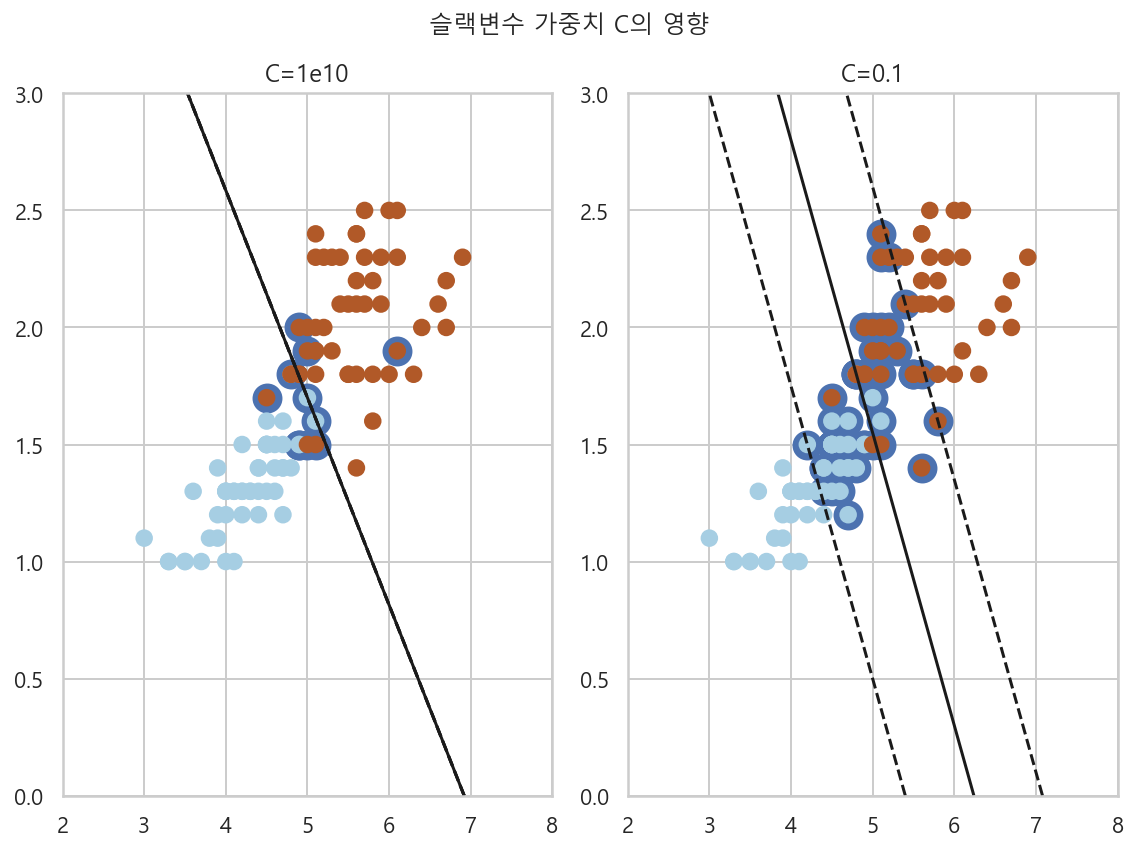

In [96]:
plotnum = 1
plt.figure(figsize=(8, 6))
for name, penalty in (("C=1e10", 1e10), ("C=0.1", 0.1)) : 
    clf = SVC(kernel="linear", C=penalty).fit(X, y)
    xx = np.linspace(2, 8)
    
    x_jin = 2
    x_jax = 8
    y_jin = 0
    y_jax = 3
    XX, YY = np.mgrid[x_jin:x_jax:200j, y_jin:y_jax:200j]
    
    levels = [-1, 0, 1]
    linestyles = ["dashed", "solid", "dashed"]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    
    plt.subplot(1, 2, plotnum)
    plt.contour(XX, YY, Z, levels, linestyles=linestyles, colors="k")
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=120, linewidth=4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=60, linewidth=1, cmap=plt.cm.Paired)
    plt.xlim(x_jin, x_jax)
    plt.ylim(y_jin, y_jax)
    plt.title(name)
    
    plotnum += 1
    
plt.suptitle("슬랙변수 가중치 C의 영향")
plt.tight_layout()
plt.show() ; 

## 올리베티 이미지 분류

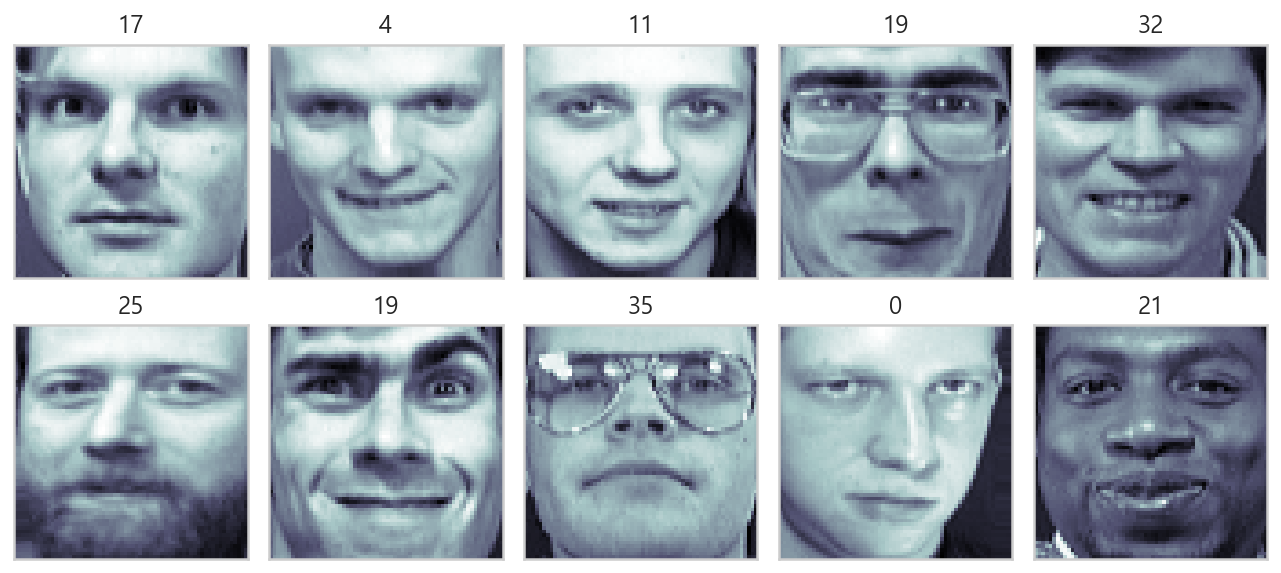

In [99]:
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()

N = 2
M = 5
np.random.seed(0)
fig = plt.figure(figsize=(9, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
klist = np.random.choice(range(len(faces.data)), N * M)
for i in range(N) : 
    for j in range(M) : 
        k = klist[i * M + j]
        ax = fig.add_subplot(N, M, i * M + j + 1)
        ax.imshow(faces.images[k], cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(faces.target[k])
plt.tight_layout()
plt.show() ; 

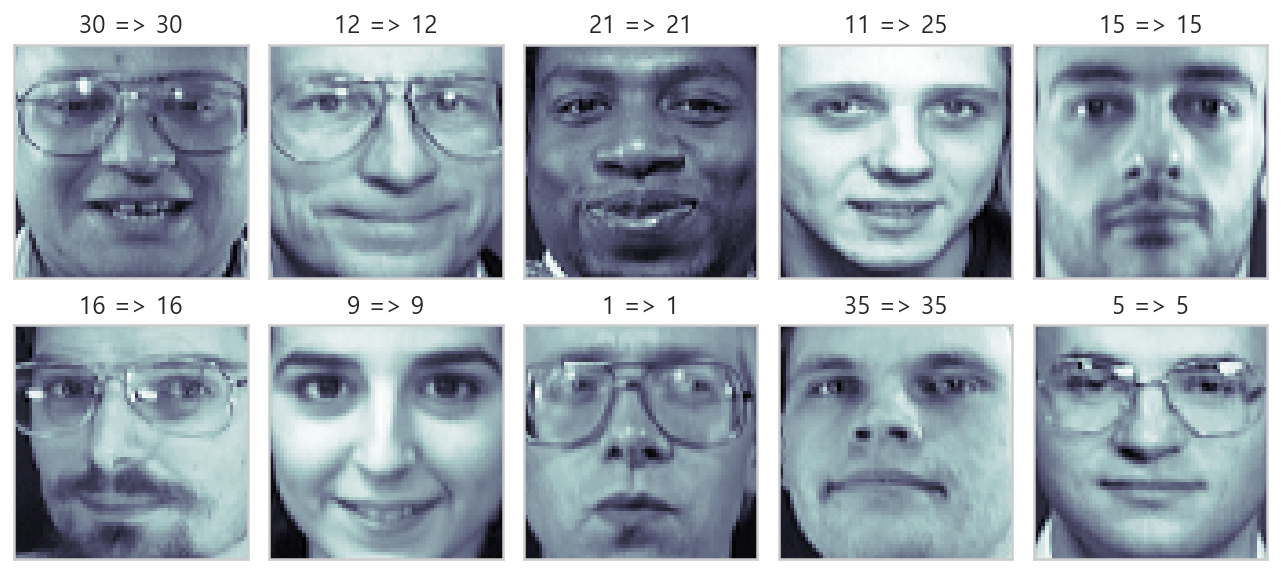

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target,
                                                   test_size=0.4, random_state=30)

from sklearn.svm import SVC
svc = SVC(kernel="linear").fit(X_train, y_train)

N = 2
M = 5
np.random.seed(0)
fig = plt.figure(figsize=(9, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
klist = np.random.choice(range(len(y_test)), N * M)

for i in range(N) : 
    for j in range(M) : 
        k = klist[i * M + j]
        ax = fig.add_subplot(N, M, i * M + j + 1)
        ax.imshow(X_test[k:(k+1), :].reshape(64, 64), cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title("%d => %d" % (y_test[k], svc.predict(X_test[k:(k + 1), :])[0]))
        
plt.tight_layout()
plt.show() ; 

In [108]:
klist

array([ 47, 117,  67, 103,   9,  21,  36,  87,  70,  88])

In [109]:
y_test[47]

30

In [106]:
from sklearn.metrics import classification_report, accuracy_score

y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)

print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         6
          11       1.00      1.00      1.00         4
          12       1.00      1.00      1.00         4
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         5
          16       1.00      1.00      1.00         7
          17       1.00    

In [107]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         3
           6       0.67      0.80      0.73         5
           7       1.00      0.83      0.91         6
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         4
          11       1.00      0.83      0.91         6
          12       1.00      1.00      1.00         6
          13       1.00      1.00      1.00         2
          14       0.71      1.00      0.83         5
          15       1.00      0.80      0.89         5
          16       0.75      1.00      0.86         3
          17       1.00    

In [122]:
svc.coef_

array([[-0.00736782, -0.00839756, -0.00826616, ..., -0.00045738,
         0.0018007 ,  0.00241521],
       [ 0.00056889,  0.00140419,  0.00095657, ...,  0.00145236,
         0.00274267,  0.00339262],
       [-0.00121581, -0.00359547, -0.00520585, ..., -0.00455642,
        -0.00357267, -0.00330651],
       ...,
       [-0.00358932, -0.00203103, -0.00047475, ..., -0.00059872,
        -0.00121681,  0.00147126],
       [-0.02448514, -0.02467155, -0.02213051, ...,  0.00607344,
         0.0033494 ,  0.00235676],
       [-0.00285377, -0.00458557, -0.00485595, ...,  0.0018041 ,
         0.00188369,  0.00106676]])

In [123]:
accuracy_score(y_test, y_pred_test)

0.9375

In [130]:
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()
X = faces.data
y = faces.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target,
                                                   test_size=0.2, random_state=0)

from sklearn.svm import SVC

penaltys = [0.01, 0.1, 1.0, 10, 100, 1e5, 1e7, 1e9, 1e11]
for p in penaltys : 
    svc = SVC(kernel="linear", C=p).fit(X_train, y_train)
    y_pred_test = svc.predict(X_test)
    print("C = {}, acc : {}".format(p, accuracy_score(y_test, y_pred_test)))

C = 0.01, acc : 0.85
C = 0.1, acc : 0.9875
C = 1.0, acc : 0.9875
C = 10, acc : 0.9875
C = 100, acc : 0.9875
C = 100000.0, acc : 0.9875
C = 10000000.0, acc : 0.9875
C = 1000000000.0, acc : 0.9875
C = 100000000000.0, acc : 0.9875
